In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
from typing import List, Tuple

In [21]:
df = pd.read_csv("/Users/jedrzejkusnierz/Desktop/programowanie/ChurnPrediction/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.describe(include = 'number')

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


We want to look at all data

In [22]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


#### We actually can drop CustomerID category

In [23]:
df = df.drop(columns = ["customerID"])

#### Checking data types

In [24]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### As we see TotalCharges are not numeric data so we need to change it's type

In [25]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

[<Axes: > <Axes: > <Axes: > <Axes: >]


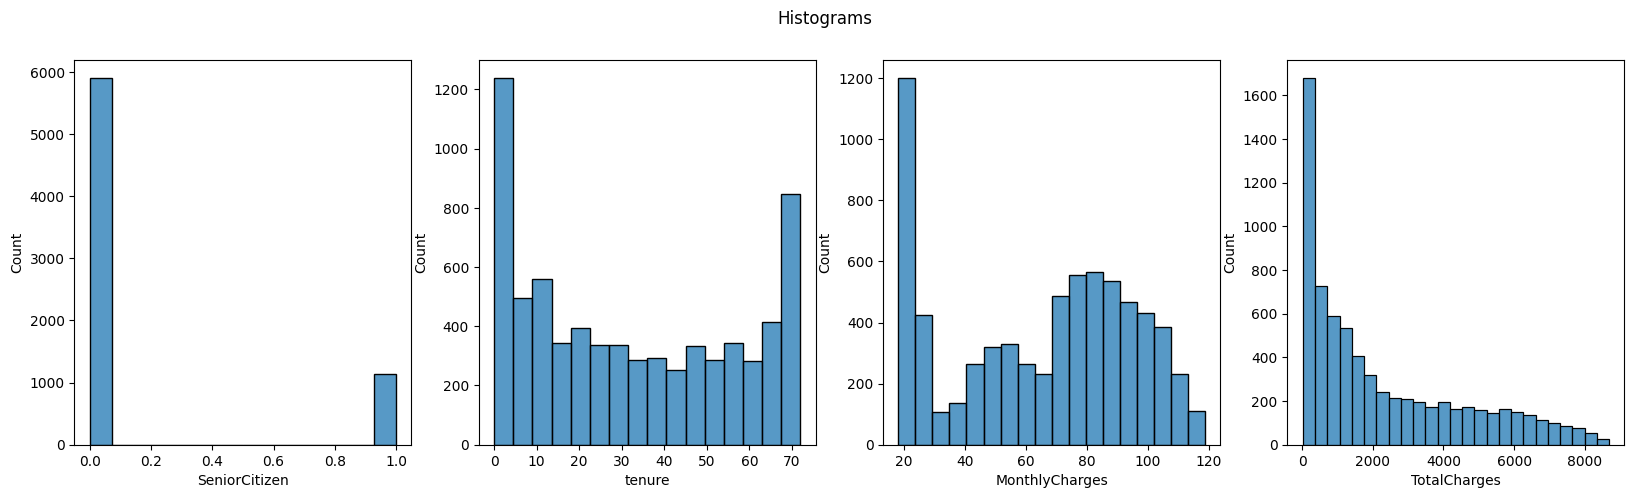

In [26]:
categories = df.select_dtypes(include='number').columns.tolist()

fig, axes = plt.subplots(1,4,figsize = (20,5))
print(axes)
for idx, category in enumerate(categories):
    sns.histplot(df[category], ax = axes[idx])
    plt.suptitle("Histograms")

In [27]:
def check_if_na():
    for category in df.columns:
        nr_of_NaN = sum(df[category].isna())
        percentage = (nr_of_NaN/df[category].__len__()) * 100
        if percentage != 0.0:
            print(f"{category} -> nr of NaN: {nr_of_NaN} -> percentage: {percentage:.2}%")
check_if_na()

TotalCharges -> nr of NaN: 11 -> percentage: 0.16%


#### Filling emmpty data in TotalCharges

In [28]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(),inplace=True)

/var/folders/m2/2pxhsy_j0jl01mj1q9s930380000gn/T/ipykernel_86069/84182948.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(),inplace=True)


### I think SeniorCitizen should be changed to categorical data - we only have 2 values there (0 and 1)

In [29]:
df['SeniorCitizen'] = pd.Categorical(df['SeniorCitizen'])

## Check relationship between data

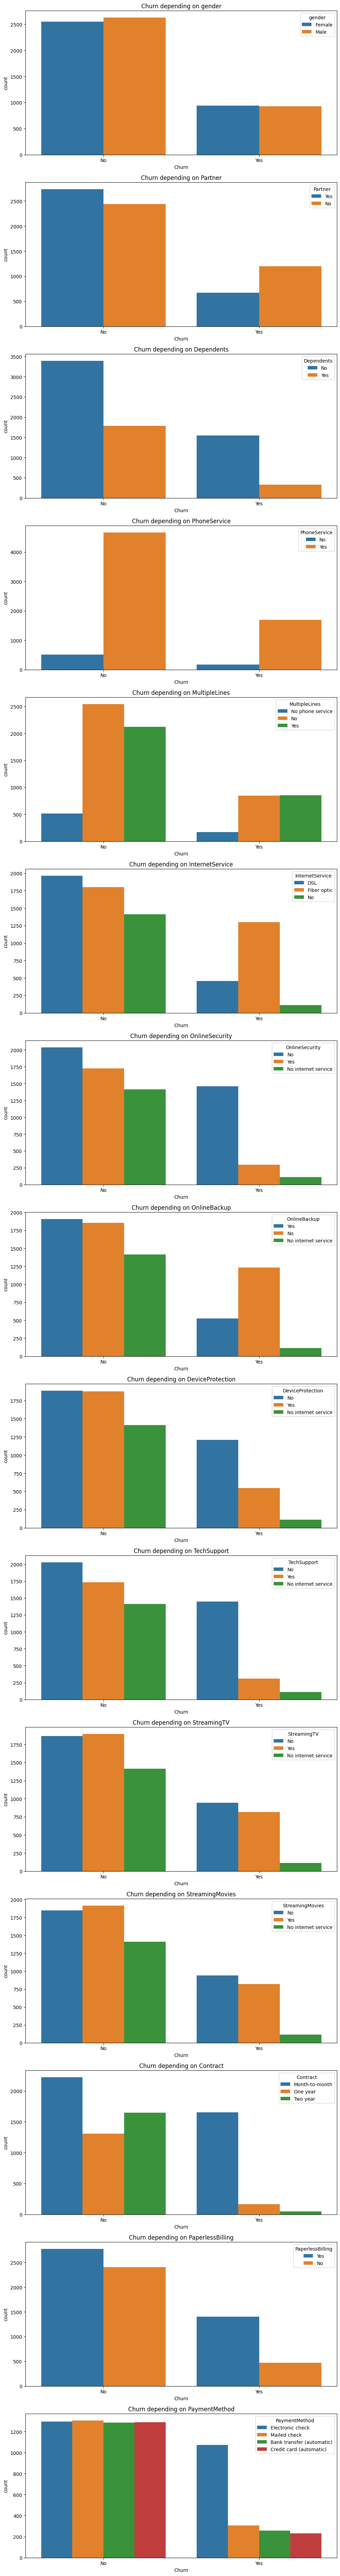

In [30]:
categories = df.select_dtypes(include='object').columns.to_list()
categories_without_churn = categories[:-1] # we need to skip Churn

fig, ax = plt.subplots(len(categories_without_churn),1, figsize = (10,5 * len(categories_without_churn)))
axes = ax.flatten()
for i, category in enumerate(categories_without_churn):
    sns.countplot(x='Churn', hue=category, data = df, ax=axes[i])
    axes[i].set_title(f"Churn depending on {category}")

plt.tight_layout()
plt.show()



#### Conclusions:
1) People without partner are more likely to resign - we can take adventage out of it
2) Having Electronic check in PaymentMethod gives higher probability of churn
3) Same things with lack of TechSupport or Online Security, Month-to-Month Contract type and so on

I don't know if we can take anything out of this trend

### Check numeric data

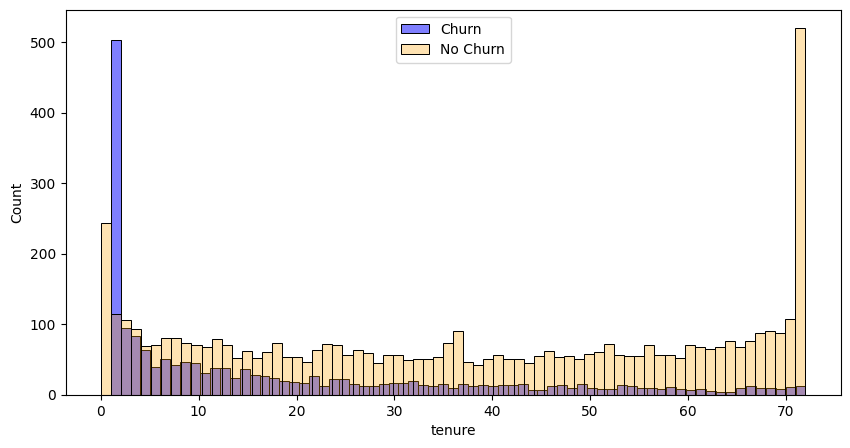

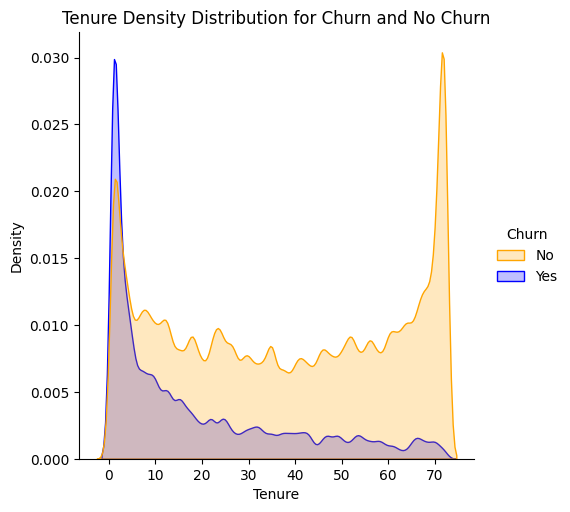

In [31]:
# Filter data based on Churn
tenure_and_churn = df[df['Churn'] == 'Yes'].tenure
tenure_not_churn = df[df['Churn'] == 'No'].tenure

# Plot histogram
f = plt.figure(figsize=(10, 5))
sns.histplot(tenure_and_churn, alpha=0.5, bins=70, kde=False, label='Churn', color='blue')
sns.histplot(tenure_not_churn, alpha=0.3, bins=70, kde=False, label='No Churn', color='orange')
plt.legend()

# Plot KDE
sns.displot(data=df, x='tenure', hue='Churn', kind='kde', fill=True, bw_adjust=0.2, palette={'Yes': 'blue', 'No': 'orange'})
plt.xlabel('Tenure')
plt.ylabel('Density')
plt.title('Tenure Density Distribution for Churn and No Churn')

plt.show()




We can notice that people who did churn in most cases did it after first month.

#### Kernel Density Function
It helps to solve problem with uneven bins in histograms due to which many information might be hidden.

## What information can we get out of histogram and density plots?

#### 1. Identify Tenure Ranges with High Churn
Observation: If the density plot shows a peak in churn for low tenure values (e.g., 0-5 months), it suggests that customers are more likely to churn early.
Action: Create a new categorical feature that indicates whether a customer's tenure is within this high-risk range

#### 2. Tenure Cutoffs
Observation: There might be noticeable cutoffs where churn behavior changes (e.g., after 6 months, churn significantly drops).
Action: Create binary features indicating whether a customer has crossed such tenure thresholds.

#### 3. Imbalance in Churn Distribution
Observation: If the churned customer distribution is much smaller compared to non-churned customers, it indicates class imbalance.
Action: Use techniques such as oversampling, undersampling, or synthetic data generation (SMOTE) to balance the dataset.


Create Tenure-Based Features:

Short Tenure Indicator: Create a binary feature indicating whether a customer's tenure is in the high churn risk range (e.g., 0-10 months).
Long Tenure Indicator: Create another binary feature for customers with very long tenure (e.g., 60+ months).

df['short_tenure'] = df['tenure'].apply(lambda x: 1 if x <= 10 else 0)
df['long_tenure'] = df['tenure'].apply(lambda x: 1 if x >= 60 else 0)


### MonthlyCharges

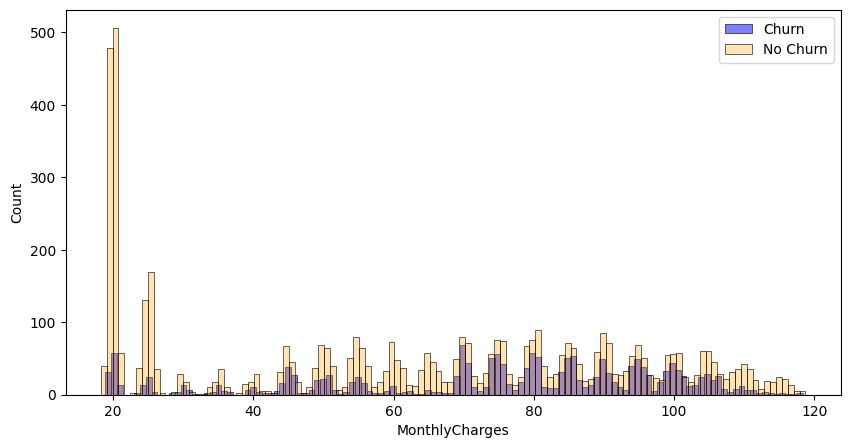

<Figure size 640x480 with 0 Axes>

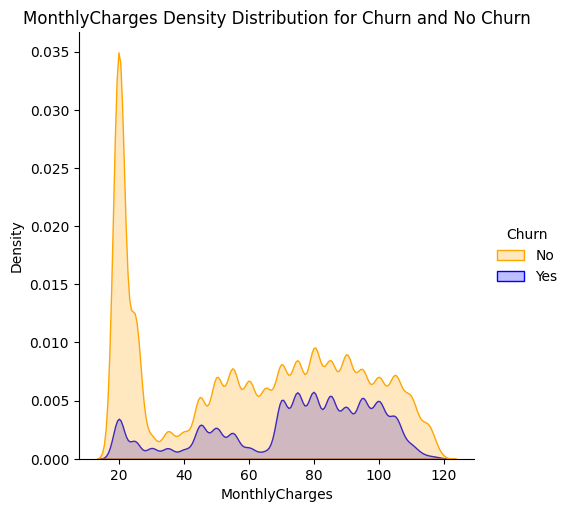

In [32]:
monthly_churn = df[df['Churn'] == 'Yes'].MonthlyCharges
monthly_not = df[df['Churn'] == 'No'].MonthlyCharges


f = plt.figure(figsize = (10,5))
sns.histplot(monthly_churn, alpha = 0.5, bins = 120, label = 'Churn', color='blue')
sns.histplot(monthly_not,alpha = 0.3,bins = 120, label = 'No Churn', color = 'orange')
plt.legend()
f2 = plt.figure()
sns.displot(data=df, x='MonthlyCharges', hue='Churn', kind='kde', fill=True, bw_adjust=0.3, palette={'Yes': 'blue', 'No': 'orange'})
plt.xlabel('MonthlyCharges')
plt.ylabel('Density')
plt.title('MonthlyCharges Density Distribution for Churn and No Churn')

plt.show()

We know one thing that with low monthly charges people do not resign.

## Correlation

#### Creating correlation function - just for check

In [33]:
import math
def covariance(_x, _y):
    return (np.sum((_x - np.mean(_x))* (_y - np.mean(_y)))/(len(_x) - 1))

def variance(variable):
    out = np.sum((variable - np.mean(variable))**2)/(len(variable) - 1)
    return out


def correlation(_x,_y):
    nominator = covariance(_x,_y)
    denominator = math.sqrt(variance(_x)) * math.sqrt(variance(_y))
    return nominator/denominator


### Checking pearson correlation between data

In [34]:
numeric_cols = df.select_dtypes('number').columns.tolist()
pair_cols = []
for id1 in range(len(numeric_cols)):
    for id2 in range(id1 + 1,len(numeric_cols)):
        pair = (numeric_cols[id1],numeric_cols[id2])
        pair_cols.append(pair)
pair_cols

[('tenure', 'MonthlyCharges'),
 ('tenure', 'TotalCharges'),
 ('MonthlyCharges', 'TotalCharges')]

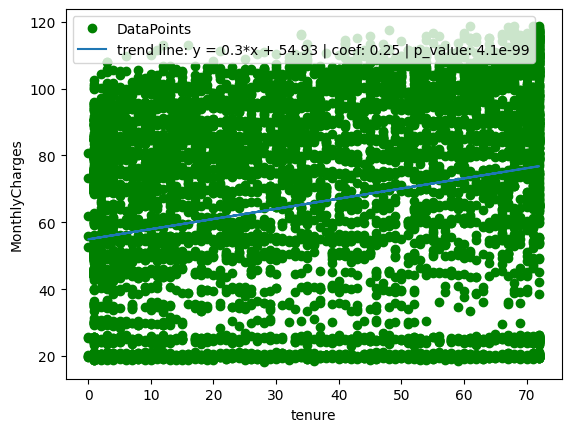

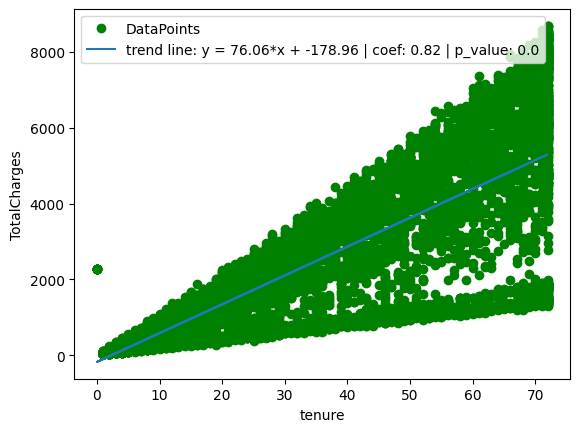

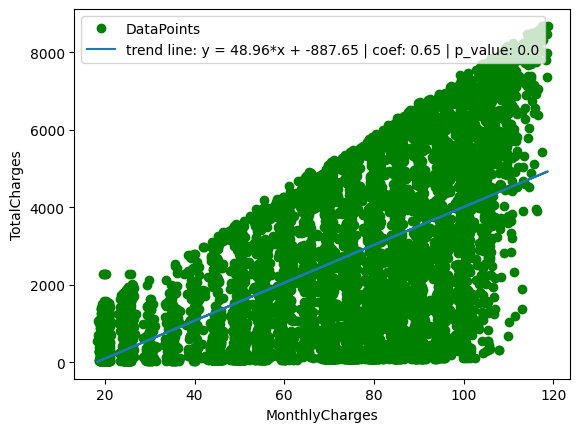

In [35]:
def create_plot(pair:Tuple) -> None:
    correl = np.corrcoef(df[pair[0]],df[pair[1]])
    slope, intercept, r,p,_ = scipy.stats.linregress(df[pair[0]], df[pair[1]])
    plt.figure()
    plt.plot(df[pair[0]], df[pair[1]], 'o', label = 'DataPoints', color = 'green')
    plt.plot(df[pair[0]], slope * df[pair[0]] + intercept, '-', label=f'trend line: y = {np.around(slope,2)}*x + {np.around(intercept,2)} | coef: {r:.2} | p_value: {p:.2}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.legend()

def create_corr_plots(col_pairs:List) -> None:
    for pair in col_pairs:
        create_plot(pair)

create_corr_plots(pair_cols)





In [36]:
numeric_df = df.select_dtypes(include='number')
c = numeric_df.corr()
c.style.background_gradient(cmap='coolwarm')

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.824757
MonthlyCharges,0.247900,1.000000,0.650468
TotalCharges,0.824757,0.650468,1.000000


We can consider droping TotalCharges column as it has strong correlation with tenure and with MonthlyCharges

## OVERALL CONCLUSIONS 
1. Change to one-hot-encoding and also switch churn to boolean variable.
2. Check imbalance in churn distribution and fill it. 
3. ~~Drop TotalCharges column it has high correlation values (it is not needed)~~
4. ~~Add Categorical variables indicating:~~
    * ~~low MonthlyCharges(this indicates hight probablity that somebody wont resign)~~
    * ~~high probabilty of tenure after first month~~
5. ~~Check what to do about Partner Category - can we get something out of it and check next categories - bc maybe we could drop some of them~~
6. ~~Check p-value for pearson correlation~~ -> it gives no information


#### 4) Adding Categorical Variables

In [37]:
# we define to functions which we gonna apply to each row of our dataframe
# if they meet criteria val is set 
def set_tenure(row):
    if row['tenure'] < 3:
        val = 1
    else:
        val = 0
    return val

def set_monthly_charges(row):
    if row['MonthlyCharges'] < 30:
        val = 1
    else:
        val = 0
    return val




df['first_month_tenure'] = df.apply(lambda row: set_tenure(row), axis=1)
df['lowMonthlyCharges'] = df.apply(lambda row: set_monthly_charges(row), axis=1)

#### 3) Droping TotalCharges Column

In [38]:
df.drop(columns=['TotalCharges'], inplace=True)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,first_month_tenure,lowMonthlyCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,No,1,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,No,0,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes,1,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No,0,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,No,0,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,No,0,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,No,0,1
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,Yes,0,0


#### Changing dtype of Churn (from Yes/No to 1/0)

In [39]:
def change_type(data):
    if data == "Yes":
        return 1
    else:
        return 0

df['Churn'] = df['Churn'].map(change_type)

#### Hot one encoding

In [141]:
df_encoded = pd.get_dummies(df)

### 2) Fixing datset imbalance

#### We need to first split dataset into train and test to be sure that in test dataset we would have only 'true' data

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [157]:
x = df_encoded.drop("Churn",axis=1)
y = df_encoded['Churn']

#### Splitting the data

First thing is to split dataset into X - variables and Y - output

In [158]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=32,stratify=y)

scaler = StandardScaler()


X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [159]:
X_val,X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.5, random_state=31)

We do have test set prepared now we need to fix imbanace in train set

([<matplotlib.patches.Wedge at 0x31841d070>,
 [Text(-0.7569452810648029, 0.798143997956338, '0'),
  Text(0.7569452810648024, -0.7981439979563384, '1')],
 [Text(-0.41287924421716515, 0.43535127161254794, '74.2%'),
  Text(0.4128792442171649, -0.4353512716125482, '25.8%')])

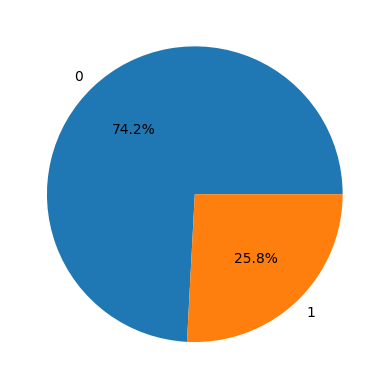

In [146]:
plt.pie(Y_train.value_counts(),labels=['0','1'],autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x3196ad4c0>,
 [Text(6.735557395310444e-17, 1.1, ''),
  Text(-2.0206672185931328e-16, -1.1, '')],
 [Text(3.6739403974420595e-17, 0.6, '50.0%'),
  Text(-1.1021821192326178e-16, -0.6, '50.0%')])

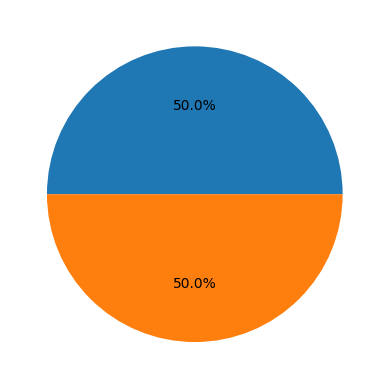

In [147]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_, Y_train_ = sm.fit_resample(X_train,Y_train)

plt.pie(Y_train_.value_counts(),autopct='%1.1f%%')

##### Data is properly balanced. We can proceed to picking up model and learning it

### TEST 1
We are splitting data with train_test_split and normalizing it using StandardScaler, then SMOTE algorithm is used to deal will imbalanced dataset.
Models tested:
1) SVM
2) RandomForest
3) XGBOOST 

##### SVM

In [155]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

parameters_grid = {
    "C" : [0.1,1,10,100],
    "gamma": ['scale', 'auto'],
    "kernel": ['linear', 'poly', 'rbf', 'sigmoid']
}

grid_search = GridSearchCV(SVC(),parameters_grid,scoring='accuracy',n_jobs=-1)

grid_search.fit(X_train_, Y_train_)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

model = grid_search.best_estimator_

y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test,y_pred)
print(f"Accuracy: {accuracy}")

Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best score: 0.8384481687325872
Accuracy: 0.7508871540099361


In [156]:
print(classification_report(Y_test,y_pred,labels=['0','1']))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       996
           1       0.57      0.63      0.60       413

   micro avg       0.75      0.75      0.75      1409
   macro avg       0.70      0.72      0.71      1409
weighted avg       0.76      0.75      0.75      1409



We did not get best accuracy with SVM

##### RandomForest

In [157]:
from sklearn.ensemble import RandomForestClassifier


parameters_grid = {
    "bootstrap" : [True,False],
    "max_features": ['sqrt', 'log2'],
    'max_depth': [10,60, None],
    # 'n_estimators': [200, 800, 1600],
    'min_samples_split': [2, 7]
}

grid_search = GridSearchCV(RandomForestClassifier(),parameters_grid,scoring='accuracy',n_jobs=-1)

grid_search.fit(X_train_, Y_train_)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

model = grid_search.best_estimator_

y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test,y_pred)
print(f"Accuracy: {accuracy}")



Best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2}
Best score: 0.8663353749151728
Accuracy: 0.7530163236337828


Similar results as with SVM

##### XGBOOST

In [159]:
from xgboost import XGBClassifier

parameters_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

xgb = XGBClassifier(eval_metric='mlogloss')

grid_search = GridSearchCV(xgb,parameters_grid,scoring='accuracy',n_jobs=-1, cv=5)

grid_search.fit(X_train_, Y_train_)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

model = grid_search.best_estimator_

y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test,y_pred)
print(f"Accuracy: {accuracy}")

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
Best score: 0.851617159022904
Accuracy: 0.7735982966643009


Better but still not perfect. Let's try simple MLP

##### MLP

In [165]:
import tensorflow as tf
from tensorflow.keras import layers,Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



num_features = X_train_.shape[1]
input_shape = (num_features,)

In [221]:
model = Sequential()
model.add(Input(shape=input_shape))
model.add(Dense(128,activation='tanh'))
model.add(Dense(64,activation='tanh'))
model.add(Dense(16,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_65 (Dense)                │ (None, 128)            │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,585 (60.88 KB)

 Trainable params: 15,585 (60.88 KB)

 Non-trainable params: 0 (0.00 B)

##### Model Training

In [222]:
from tensorflow import keras
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy'],
    )

callback = keras.callbacks.EarlyStopping(monitor='accuracy', patience=5,min_delta=0.001)

epochs = 100
history = model.fit(X_train_,Y_train_,batch_size=32,epochs=epochs,callbacks = [callback],validation_data=(X_val,Y_val))

Epoch 1/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 737us/step - accuracy: 0.7584 - loss: 0.4975 - val_accuracy: 0.7642 - val_loss: 0.4947
Epoch 2/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.7991 - loss: 0.4430 - val_accuracy: 0.7628 - val_loss: 0.4518
Epoch 3/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.8045 - loss: 0.4247 - val_accuracy: 0.7557 - val_loss: 0.4552
Epoch 4/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - accuracy: 0.8043 - loss: 0.4183 - val_accuracy: 0.7983 - val_loss: 0.4254
Epoch 5/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - accuracy: 0.8203 - loss: 0.4030 - val_accuracy: 0.7898 - val_loss: 0.4304
Epoch 6/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.8335 - loss: 0.3813 - val_accuracy: 0.7955 - val_loss: 0.4322
Epoch 7/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.8321 - loss: 0.3792 - val_accuracy: 0.8082 - val_loss: 0.4084
Epoch 8/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.8447 - loss: 0

##### Visualization

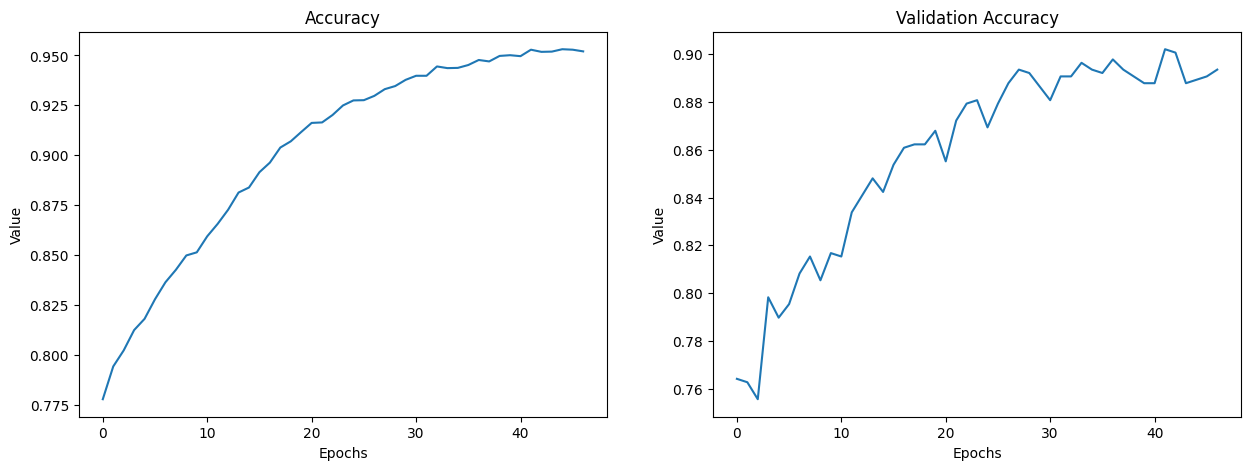

In [233]:
fig, ax = plt.subplots(1,2,figsize = (15,5))
ax[0].plot(history.history['accuracy'])
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Value")
ax[0].set_title("Accuracy")
ax[1].plot(history.history['val_accuracy'])
ax[1].set_title("Validation Accuracy")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Value")

plt.show()

##### Model Evaluation on Test Set

In [236]:
model.evaluate(X_test,Y_test)[1]

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - accuracy: 0.8816 - loss: 0.3756


0.8921985626220703

##### Metrics

In [235]:
from sklearn.metrics import precision_score, recall_score, f1_score
y_pred_prob = model.predict(X_test)

y_pred = (y_pred_prob > 0.5).astype(int)

precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step
Precision: 0.7801
Recall: 0.8142
F1-Score: 0.7968


We might want to try CatBoost. To do so we need to go back a bit and not perform hot-one-encoding

##### CatBoost

In [122]:
from sklearn.model_selection import StratifiedShuffleSplit

x = df.drop("Churn",axis=1)
y = df['Churn']

sss = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=64)


train_index, test_index = next(sss.split(x,y))

X_train = x.loc[train_index]
Y_train = y.loc[train_index]

X_test = x.loc[test_index]
Y_test = y.loc[test_index]



Catboost Init

In [123]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
categorical = df.select_dtypes(include=['object','category']).columns.to_list()

model = CatBoostClassifier(verbose=False, random_state=0, scale_pos_weight=3)


model.fit(X_train, Y_train, cat_features=categorical, eval_set=(X_test, Y_test))


y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test,y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7828246983676366


#### We are just saving Catboost Model (it did not have best results but with MLP we get like 50 features which could be hard to use later in streamlit app...)

In [103]:
import os


model_directory = "./model"
os.mkdir(model_directory)

if not os.path.exists(model_directory):
    os.mkdir(model_directory)


full_path = os.path.join(model_directory, "catmodel.cbm")

model.save_model(full_path)

In [125]:
X_train.to_csv("X_train.csv",index=False)
Y_train.to_csv("Y_train.csv",index=False)
X_test.to_csv("X_test.csv",index=False)
Y_test.to_csv("Y_test.csv",index=False)

In [242]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'first_month_tenure',
       'lowMonthlyCharges'],
      dtype='object')